# Time Series Project

I am going to analyse few important companies stocks such as Amazon, Google, Microsoft, etc.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path=r"F:\Python_Data_Analyis_Project\individual_stocks_5yr-20230326T133914Z-001\individual_stocks_5yr"
comapnies_list=['AAPL_data.csv','GOOGL_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data= pd.DataFrame()
for file in comapnies_list:
    current_df= pd.read_csv(path+'/'+ file)
    all_data=pd.concat([all_data,current_df])
all_data.shape  

(5036, 7)

In [3]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

### Problem_statement 1: Analyse closing price of all the stocks:

In [4]:
tech_list= all_data['Name'].unique()

In [5]:
all_data['date']=pd.to_datetime(all_data['date'])

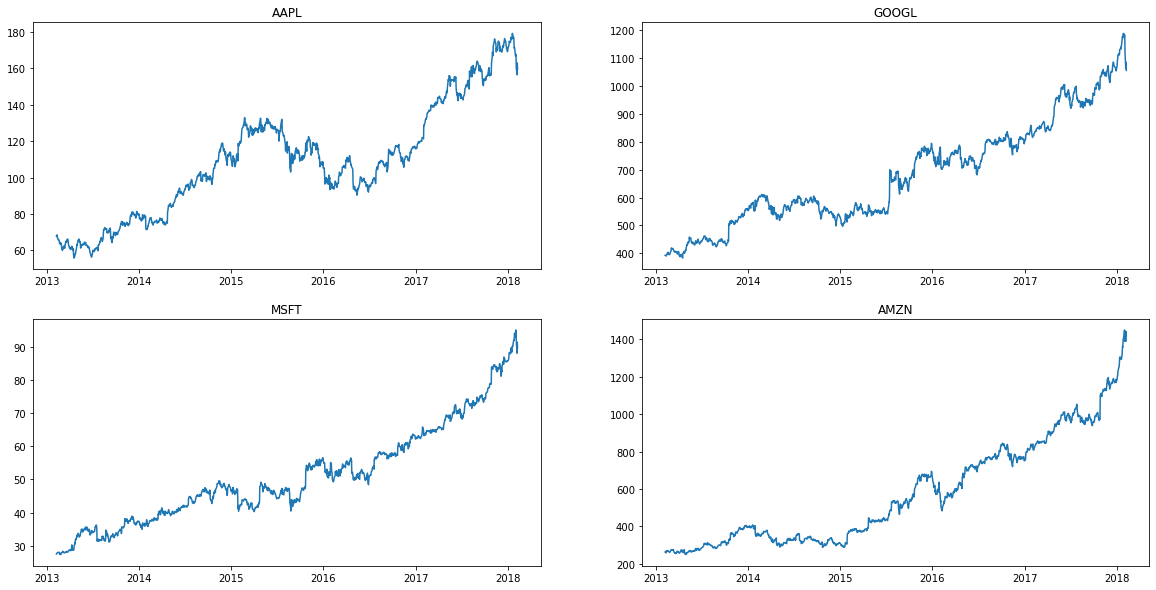

In [6]:
plt.figure(figsize=(20,10))
for i, company in enumerate(tech_list):
    plt.subplot(2,2,i+1)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)    

Conclusion: 
- We can now analyse the closing price of each stock in different years based on the plot that we have obtained.
- Microsoft and Amazon some how shows the exponential growth, which is good for the technology companies.

## Problem_statement 2: Analyse the total volume of each stock being traded each day:

In [7]:
import plotly.express as px

In [8]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    figure= px.line(df,x='date', y='volume',title=company)
    figure.show()

## Problem_statement 3: Analyse daily price change in stocks:

In [9]:
all_data['%Price_Change']=((all_data['close']-all_data['open'])/all_data['open'])*100

Let's use the plotly to find percentage price change in open and close values of the stocks for each companies on daily basis.

In [10]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    figure= px.line(df,x='date', y='%Price_Change',title=company)
    figure.show()

In [11]:
df2=all_data.copy()

In [12]:
df2.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   %Price_Change  
0       0.206751  
1       0.719832  
2      -2.421264  
3      -0.042850  
4       0.445600

In [13]:
df2.dtypes

date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
%Price_Change           float64
dtype: object

In [14]:
df2.set_index('date',inplace=True)

In [15]:
df2

open       high        low      close     volume  Name  \
date                                                                      
2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL   
2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL   
2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL   
2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL   
2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL   
...               ...        ...        ...        ...        ...   ...   
2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN   
2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN   
2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN   
2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN   
2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN   

            %Price_Change  
date                       
2013-02-08       0.206751  
2013-02-11       0.719832  
2013-02-12      -2.421264  
2013-02-13      -0.042850  
2013-02-14       0.445600  
...                   ...  
2018-02-01      -3.806228  
2018-02-02      -3.211068  
2018-02-05      -0.899745  
2018-02-06       5.977407  
2018-02-07      -2.223602  

[5036 rows x 7 columns]

In [16]:
df2['2013-02-08':'2013-02-14']

open      high       low     close     volume   Name  \
date                                                                   
2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416   AAPL   
2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425   AAPL   
2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363   AAPL   
2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995   AAPL   
2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154   AAPL   
2013-02-08  390.4551  393.7283  390.1698  393.0777    6031199  GOOGL   
2013-02-11  389.5892  391.8915  387.2619  391.6012    4330781  GOOGL   
2013-02-12  391.2659  394.3440  390.0747  390.7403    3714176  GOOGL   
2013-02-13  390.4551  393.0677  390.3750  391.8214    2393946  GOOGL   
2013-02-14  390.2549  394.7644  389.2739  394.3039    3466971  GOOGL   
2013-02-08   27.3500   27.7100   27.3100   27.5500   33318306   MSFT   
2013-02-11   27.6500   27.9200   27.5000   27.8600   32247549   MSFT   
2013-02-12   27.8800   28.0000   27.7500   27.8800   35990829   MSFT   
2013-02-13   27.9300   28.1100   27.8800   28.0300   41715530   MSFT   
2013-02-14   27.9200   28.0600   27.8700   28.0400   32663174   MSFT   
2013-02-08  261.4000  265.2500  260.5550  261.9500    3879078   AMZN   
2013-02-11  263.2000  263.2500  256.6000  257.2100    3403403   AMZN   
2013-02-12  259.1900  260.1600  257.0000  258.7000    2938660   AMZN   
2013-02-13  261.5300  269.9600  260.3000  269.4700    5292996   AMZN   
2013-02-14  267.3700  270.6500  265.4000  269.2400    3462780   AMZN   

            %Price_Change  
date                       
2013-02-08       0.206751  
2013-02-11       0.719832  
2013-02-12      -2.421264  
2013-02-13      -0.042850  
2013-02-14       0.445600  
2013-02-08       0.671678  
2013-02-11       0.516441  
2013-02-12      -0.134333  
2013-02-13       0.349925  
2013-02-14       1.037527  
2013-02-08       0.731261  
2013-02-11       0.759494  
2013-02-12       0.000000  
2013-02-13       0.358038  
2013-02-14       0.429799  
2013-02-08       0.210406  
2013-02-11      -2.275836  
2013-02-12      -0.189051  
2013-02-13       3.035981  
2013-02-14       0.699405

## Montly mean of the close feature

<AxesSubplot:xlabel='date'>

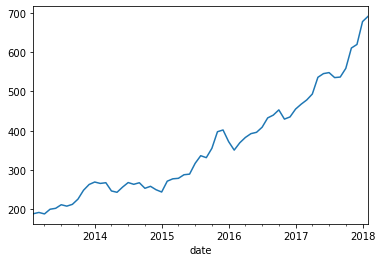

In [17]:
df2['close'].resample('M').mean().plot()

Conclusion: Mean price is increasing rapidly after year 2016 as per the trends that we obtained from the data.

## Yearly mean of the close feature

In [18]:
df2['close'].resample('Y').mean()

date
2013-12-31    213.178104
2014-12-31    258.847763
2015-12-31    316.220025
2016-12-31    405.650164
2017-12-31    532.623471
2018-12-31    680.741442
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

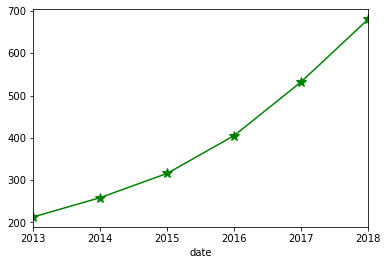

In [19]:
%matplotlib inline
df2['close'].resample('Y').mean().plot(kind='line', marker='*', color='green', ms=10)

<AxesSubplot:xlabel='date'>

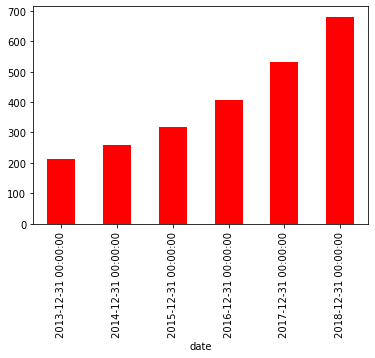

In [20]:
df2['close'].resample('Y').mean().plot(kind='bar',color='red')

#### Problem_statement 4: Analyse whether stock prices of these tech companies (Amazon, Apple, Google, Microsoft) are correlated or not!!!

In [23]:
AAPL_data=pd.read_csv(path+'/'+'AAPL_data.csv')
GOOGL_data=pd.read_csv(path+'/'+'GOOGL_data.csv')
MSFT_data=pd.read_csv(path+'/'+'MSFT_data.csv')
AMZN_data=pd.read_csv(path+'/'+'AMZN_data.csv')

In [24]:
close= pd.DataFrame()

In [26]:
close['AAPL_data']=AAPL_data['close']
close['GOOGL_data']=GOOGL_data['close']
close['MSFT_data']=MSFT_data['close']
close['AMZN_data']=AMZN_data['close']

In [27]:
close.head()

AAPL_data  GOOGL_data  MSFT_data  AMZN_data
0    67.8542    393.0777      27.55     261.95
1    68.5614    391.6012      27.86     257.21
2    66.8428    390.7403      27.88     258.70
3    66.7156    391.8214      28.03     269.47
4    66.6556    394.3039      28.04     269.24

In [29]:
import seaborn as sns

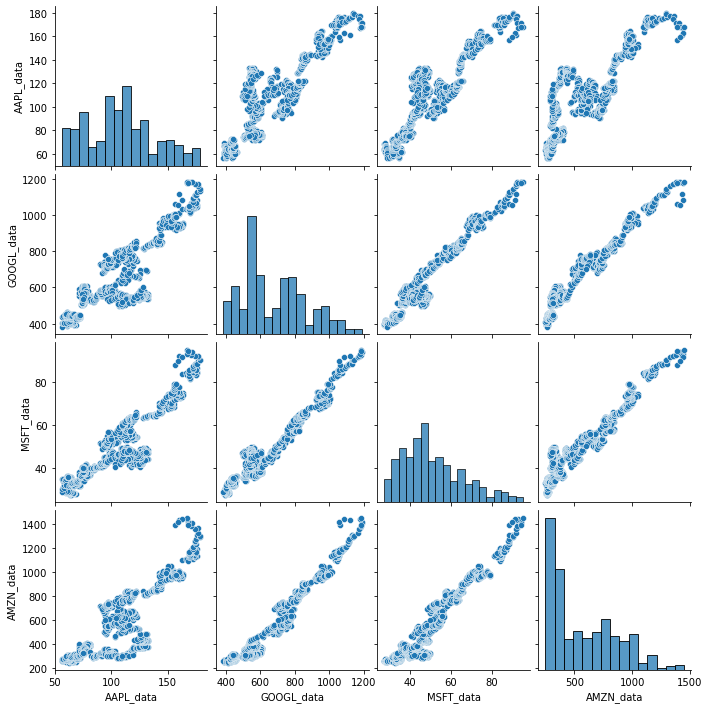

In [30]:
sns.pairplot(data=close)

## Conclusions: 

- There is a linear correlation between Google and microsoft Closing Price, Amazon and Microsoft, Amazon and Google.
- In some cases we are not getting good correlation between the closing prices. 

<AxesSubplot:>

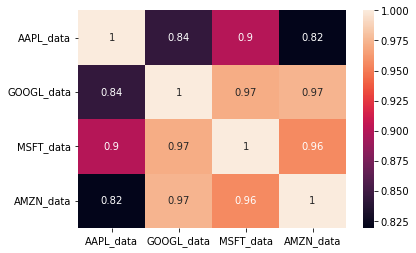

In [32]:
sns.heatmap(close.corr(), annot=True)

- Heat map give clear idication of the correlation between the closing prices of all the four tech Giants.

#### Problem_statement 5: Analyse the daily returns of each stock and how they are corelated!

In [33]:
data=pd.DataFrame()

In [37]:
data['appl_change']=(AAPL_data['close']- AAPL_data['open'])/AAPL_data['close']*100
data['msft_change']=(MSFT_data['close']- MSFT_data['open'])/MSFT_data['close']*100
data['googl_change']=(GOOGL_data['close']- GOOGL_data['open'])/GOOGL_data['close']*100
data['amzn_change']=(AMZN_data['close']- AMZN_data['open'])/AMZN_data['close']*100

In [38]:
data.head()

appl_change  msft_change  googl_change  amzn_change
0     0.206325     0.725953      0.667196     0.209964
1     0.714688     0.753769      0.513788    -2.328836
2    -2.481344     0.000000     -0.134514    -0.189409
3    -0.042869     0.356761      0.348705     2.946525
4     0.443624     0.427960      1.026873     0.694548

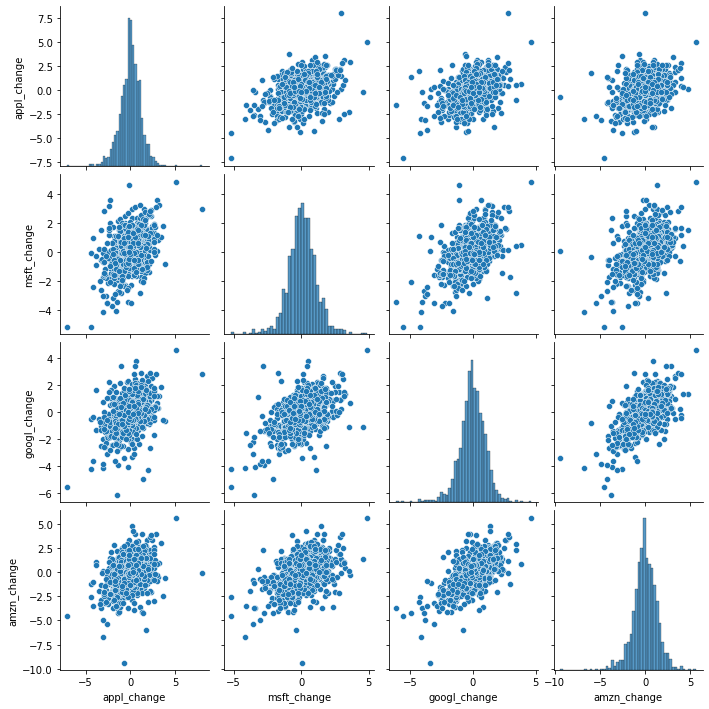

In [39]:
sns.pairplot(data=data)

<AxesSubplot:>

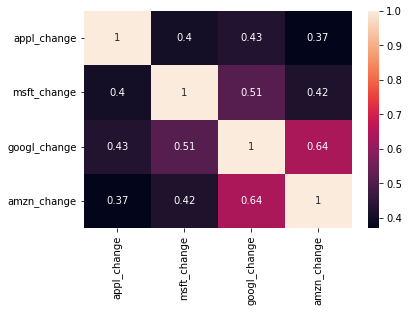

In [40]:
sns.heatmap(data.corr(),annot=True)

- The higher correlated value from the heat map is 0.64, which is between googl_change and amzn_change. This two tech giants show 64% of correlation in their price change. It means some common market factor changes the closing and opening price of these tech two tech giants.
- These corelation is help in understanding the behaviour of market and the key affecting factors of the market during investment in the technology giants.

### Problem_statement 6: Value at risk analysis for tech companies 

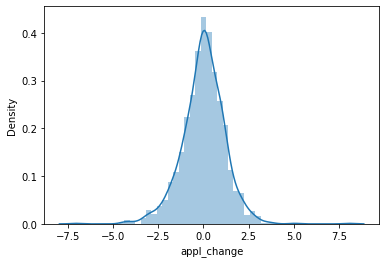

In [43]:
sns.distplot(data['appl_change'])
import warnings
warnings.filterwarnings('ignore')

In [44]:
data['appl_change'].std()
# 68% of the entire data.

1.1871377131421237

In [47]:
data['appl_change'].std()*2
# 95% of the entire data

2.3742754262842474

In [48]:
data['appl_change'].std()*3
# 99.7% of the entire data between third standard deviation

3.561413139426371

The distribution follows a normal distribution and we have the value of one standard deviation, two standard deviation and three standard deviation.

In [49]:
data['appl_change'].quantile(0.1)

-1.4246644227944307

### Conclusion: 90% time my worst daily loss doesnot exceed to -1.42.

In [50]:
data.describe()

appl_change  msft_change  googl_change  amzn_change
count  1259.000000  1259.000000   1259.000000  1259.000000
mean     -0.000215     0.076404     -0.028349    -0.000398
std       1.187138     1.059260      1.052191     1.358679
min      -7.104299    -5.177618     -6.107290    -9.363077
25%      -0.658021    -0.509241     -0.575799    -0.738341
50%       0.042230     0.061069     -0.004508    -0.002623
75%       0.715427     0.703264      0.624730     0.852568
max       8.000388     4.861491      4.652214     5.640265

In [51]:
data.describe().T

count      mean       std       min       25%       50%  \
appl_change   1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
msft_change   1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   
googl_change  1259.0 -0.028349  1.052191 -6.107290 -0.575799 -0.004508   
amzn_change   1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   

                   75%       max  
appl_change   0.715427  8.000388  
msft_change   0.703264  4.861491  
googl_change  0.624730  4.652214  
amzn_change   0.852568  5.640265

<AxesSubplot:>

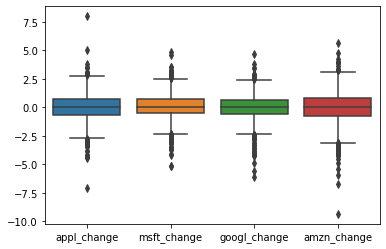

In [53]:
sns.boxplot(data=data)